In [64]:
# Facebook data mining bootcamp !!!

# important imports 
import os
import json
import numpy as np
import pylab as pl
import datetime
from datetime import datetime


In [65]:
# globals 

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 900
MESSAGE_THRESHOLD = 50
MESSAGE_BOUND = 100000


In [66]:
# get json data for the individual chats in your messages folder 

def get_json_data(chat):
    try:
        # you may need to change the directory path, depends on where you've downloaded your fb messages to. 
        json_location = CURRENT_DIRECTORY + "/messages/inbox/" + chat + "/message_1.json"
        #print(json_location,'\r')
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)


    
# create new globals for data to be plotted 
chats = os.listdir(CURRENT_DIRECTORY + "/messages/inbox")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0



print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')


Analyzing 900 chats...


In [67]:
# sort data into new gobals 

for chat in chats:
    url = chat
    json_data = get_json_data(chat)

    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Finished processing chats...


In [68]:
# continue sorting messages into the new globals (dictionaries)
# you may have to alter this code a bit depending on what functions you would like to add


for i, (messagesn, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    #print(str(i) + " - " + str(messagesn) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.utcfromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

    

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

Found 3404 invalid messages...
Found 220 chats with 50 messages or more


In [72]:
#First feature: find out how many left me on seen and how many did I leave on seen (actually just who sent the last message)

seenByMe=0
meBeingSeen=0
saidGoodbye=0

for i, (messagesn, chat, messages) in enumerate(sorted_chats):    
    try:
        lastmess=messages[messagesn-1]['content']
        if not ('adios' in lastmess or 'bye' in lastmess or 'Bye' in lastmess):
            if messages[messagesn-1]["sender_name"] == 'Santiago Mille' and ('content' in messages[messagesn-1].keys()):
                meBeingSeen += 1
            else:
                seenByMe +=1
        else:
            saidGoodbye+=1
    except KeyError:
        # happens for special cases like users who deactivated, unfriended, blocked
        print('',end='')
        
print(saidGoodbye)
        



3


In [74]:
#Second feature average amout of attachments per conversation (aka: my personal cloud storage)

totalAtt=0
convs=len(sorted_chats)
conv_with_most_att=0
person_with_most_att=''

for i, (messagesn, chat, messages) in enumerate(sorted_chats): 
    
    att_per_chat=0
    
    name = chat
    
    for message in messages:
        try:
            if message["sender_name"] == 'Santiago Mille' and ('files' in message.keys() or 'photos' in message.keys()):
                try:
                    totalAtt +=len(message['files'])
                    att_per_chat+=len(message['files'])
                except:
                    try:
                        totalAtt +=len(message['photos'])
                        att_per_chat+=len(message['photos'])
                    except:
                        print('Error')
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            print("not valid chat")

    if att_per_chat>conv_with_most_att:
        conv_with_most_att=att_per_chat
        person_with_most_att = name
        
avgAtt=totalAtt/convs
        
print("Person i've sent the most pictures/files: ", person_with_most_att, ' sending: ', conv_with_most_att)
print("I have sent a total of ", totalAtt, ' files/pictures in ', convs, ' conversations, having and average of: ', avgAtt, ' attachments per conv.')
    

Person i've sent the most pictures/files:  MarioAlberto_20b2luno5Q  sending:  333
I have sent a total of  1394  files/pictures in  220  conversations, having and average of:  6.336363636363636  attachments per conv.


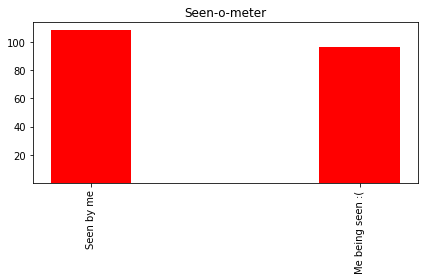

{'Seen by me': 108, 'Me being seen :(': 96}


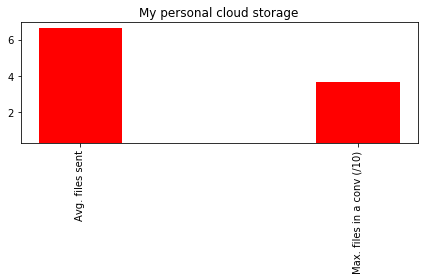

6.336363636363636  -  333


In [82]:
# plotting functions


def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    print(list(plotted_data.values()))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = []
        for time in person_to_times[person]:
            plotted_data.append(time)
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

    
def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    #plot_num_messages(chat_number)
    #plot_histogram_time(chat_number)
    #plot_histogram_words(chat_number)
    plotSeen()
    plotFilesSent()
    
def plotSeen():
    X = np.arange(2)
    data = {'Seen by me':seenByMe,'Me being seen :(':meBeingSeen}
    pl.bar(X, list(data.values()), align='center', width=0.3, color = 'r', bottom = 0.3)
    pl.xticks(X, data.keys(), rotation = 90)
    pl.title('Seen-o-meter')
    pl.tight_layout()
    pl.show()
    print(data)
    
def plotFilesSent():
    X = np.arange(2)
    data = {'Avg. files sent':avgAtt,'Max. files in a conv (/10)':conv_with_most_att/100}
    pl.bar(X, list(data.values()), align='center', width=0.3, color = 'r', bottom = 0.3)
    pl.xticks(X, data.keys(), rotation = 90)
    pl.title('My personal cloud storage')
    pl.tight_layout()
    pl.show()
    print(avgAtt, ' - ', conv_with_most_att)



plot(50)